# LCAO for the molecular hydrogen ion

The functional form of the difference between the energy estimate of the molecular hydrogen ion and the hydrogen atom is
\begin{equation}
F(s) = \frac{2}{s} \frac{\left(1-\frac23 s^2\right) e^{-s} + (1+s) e^{-2s}}{1 + \left(1 + s + \frac13 s^2 \right) e^{-s}},
\end{equation}
where $s = R/a$ and $F$ is measured in units of $-E_1$.

We can express this function in the form of three integrals: the overlap $S$, direct $D$ and exchange $X$ integrals, given by
\begin{align}
S(s) &= \left(1 + s + \frac13 s^2\right) e^{-s}, \\
D(s) &= \frac{1}{s} - \left(1 + \frac{1}{s}\right) e^{-2s}, \\
X(s) &= \left(1 + s\right) e^{-s},
\end{align}
from which we then get two solutions for the excess energy (symmetric and antisymmetric combinations):
\begin{equation}
E_\pm(s) = \frac{2}{s} - 2 \frac{D(s) \pm X(s)}{1 \pm S(s)}.
\end{equation}

In [1]:
# Python libraries.

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def F(s):
    return (2/s) * ((1 - 2 * s * s / 3) * np.exp(-s) + (1+s) * np.exp(-2*s)) / (1 + (1 + s + s * s / 3) * np.exp(-s))

(-0.2, 1.5)

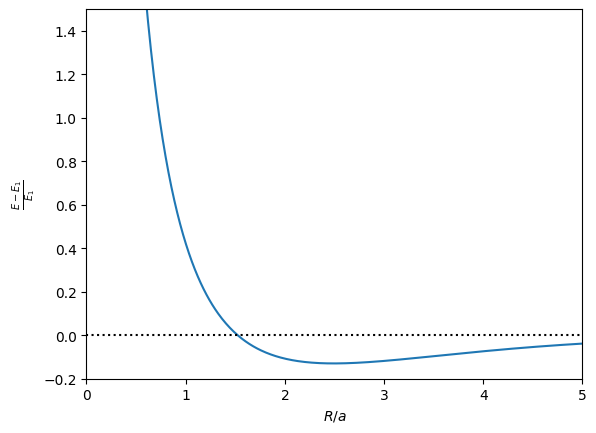

In [8]:
# Plot F(s)
s = np.linspace(.1, 5, 500)
plt.plot(s, F(s))
plt.xlabel("$R/a$")
plt.ylabel("$\\frac{E-E_1}{E_1}$")
plt.axhline(y = 0, color = 'k', linestyle = ':')
plt.xlim(0,5)
plt.ylim(-0.2,1.5)

In [2]:
def S(s):
    return (1 + s + s*s/3) * np.exp(-s)

def D(s):
    return (1/s) - (1+(1/s)) * np.exp(-2*s)

def X(s):
    return (1+s) * np.exp(-s)

def Eplus(s):
    return (2/s) - 2 * (D(s) + X(s)) / (1 + S(s))

def Eminus(s):
    return (2/s) - 2 * (D(s) - X(s)) / (1 - S(s))

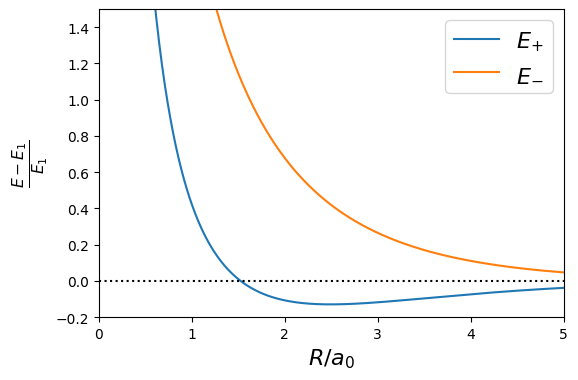

In [10]:
# Plot energies
s = np.linspace(.1, 5, 500)

fig, ax = plt.subplots(figsize=(6,4))

line1 = ax.plot(s, Eplus(s), label='$E_{+}$')
line2 = ax.plot(s, Eminus(s), label='$E_{-}$')

ax.axhline(y = 0, color = 'k', linestyle = ':')

ax.set_xlim(0,5)
ax.set_ylim(-0.2,1.5)
ax.set_xlabel('$R/a_0$', fontsize=16)
ax.set_ylabel('$\\frac{E-E_1}{E_1}$', fontsize=16)
ax.legend(fontsize=16)

plt.show()